In [38]:
from src.FunctionsSurface import *
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm  # Import LogNorm

In [3]:
# Separate files to surface
N__ = [5000, 10000, 20000, 40000, 80000]
dim = [1,2,3,4]

for j in N__:
    for i in dim:
        parms =  [k for k in list_all_folders(j,i)]        
        for l in range(len(parms)):
            all_properties_dataframe(j, i, parms[l][0], parms[l][1])

In [3]:
alpha_a = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
alpha_g = [0.1, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]

for n in N__:
    for d in dim:
        for g in alpha_g:
            for a in alpha_a:
                alpha_G = list_all_folders_for_alpha_fixed(n, d , a, g, alpha_g_variable=True)
                create_all_properties_file(n, d, a, alpha_G, alpha_g_variable=True)

    for d in dim:
        for a in alpha_a:
            for g in alpha_g:
                alpha_A = list_all_folders_for_alpha_fixed(n, d , a, g, alpha_g_variable=False)
                create_all_properties_file(n, d, alpha_A, g, alpha_g_variable=False)

In [56]:
data = pd.read_csv("../../data/all_data.csv",sep=',')
all_data =  filter_dataframe(data)
all_data.head()

e:\TsallisND\scripts\jupyter\src\FunctionsSurface.py:97: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, mask_alpha_a], ignore_index=True)


,alpha_a,alpha_g,n_size,dim,short_mean,diameter_mean,ass_coeff_mean,short_err,diameter_err,ass_coeff_err,n_samples
0,0.0,5.0,20000,4,10.091799,27.095238,-0.050876,0.091923,0.337390,0.002933,21
1,0.0,1.0,20000,4,9.917034,27.285714,-0.047732,0.097390,0.317302,0.002197,21
2,0.0,4.0,20000,4,10.004558,27.142857,-0.050495,0.104922,0.332993,0.002182,21
3,0.0,2.0,20000,4,10.064170,27.310559,-0.049173,0.029914,0.107880,0.000642,322
4,0.0,9.0,20000,4,9.856383,26.619048,-0.044308,0.074967,0.368240,0.001762,21


In [57]:
all_data["n_size"].unique()

array([20000, 40000, 10000, 5000], dtype=object)

In [58]:
df__ = assortativity_N(all_data, [5000, 10000, 20000, 40000])

median = [2.0, 5.0, 5.0, 5.0]
mean =  [2.68, 4.64, 5.45, 6.23]


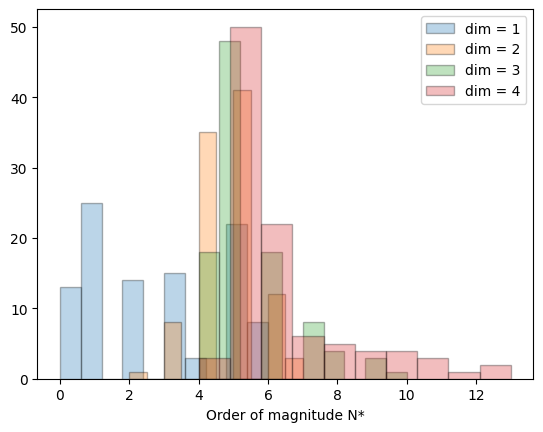

In [67]:
median = []
avarage = []
for i in [1,2,3,4]:
    order = [find_order_of_magnitude(i) for i in df__[df__['dim']  == i ]["N*"].values]
    median.append(np.median(sorted(order)))
    avarage.append(np.mean(order))
    plt.hist(order,label=f'dim = {i}', alpha = 0.3, edgecolor='black')
print("median =",median)
print("mean = ",avarage)
plt.xlabel("Order of magnitude N*")
plt.legend()
plt.show()

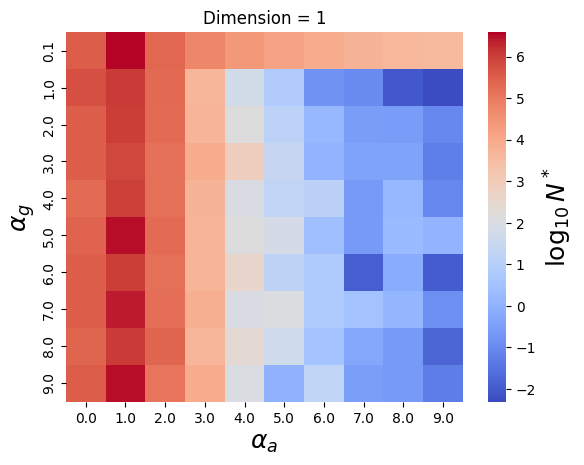

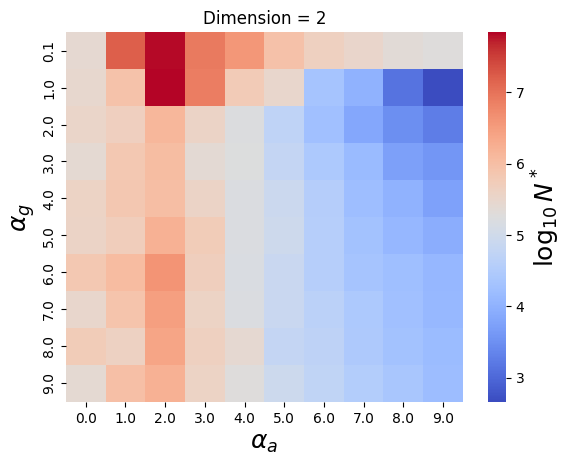

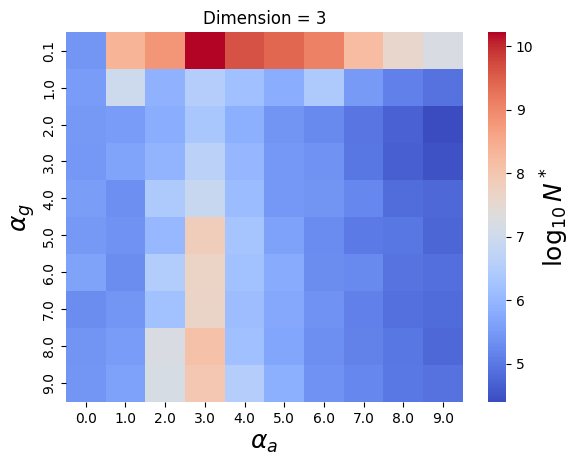

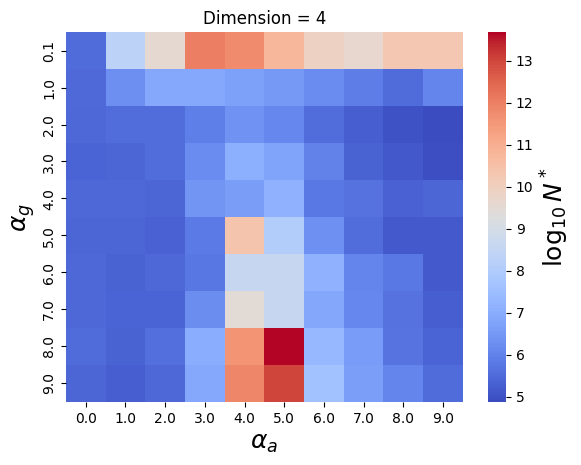

In [73]:
dim = 2
for dim in [1,2,3,4]:
        data = {'x': df__[df__["dim"] == dim]["alpha_a"].values,
                'y': df__[df__["dim"] == dim]["alpha_g"].values,
                'z': np.log10(df__[df__["dim"] == dim]["N*"].values)}

        df_ = pd.DataFrame(data)

        df_ = df_.sort_values(by='y')

        # Pivot the DataFrame to prepare for heatmap
        pivot_df = df_.pivot(index='y', columns='x', values='z')

        # Plotting the heatmap
        #ax = sns.heatmap(pivot_df, cmap='coolwarm', norm=LogNorm())
        ax = sns.heatmap(pivot_df, cmap='coolwarm', yticklabels=sorted(df_['y'].unique()))
        cbar = ax.collections[0].colorbar
        cbar.set_label(r"$\log_{10} N^*$", fontsize=18)

        # Adding title and labels
        plt.title(f'Dimension = {dim}')
        plt.xlabel(r'$\alpha_a$',fontsize=18)
        plt.ylabel(r'$\alpha_g$',fontsize=18)

        # Display the plot
        plt.show()

In [3]:
all_data_filter = filter_dataframe(all_data)
all_data_filter.head()

e:\TsallisND\scripts\jupyter\src\FunctionsSurface.py:96: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, mask_alpha_a], ignore_index=True)


,alpha_a,alpha_g,n_size,dim,short_mean,diameter_mean,ass_coeff_mean,short_err,diameter_err,ass_coeff_err,n_samples
0,0.0,5.0,20000,4,10.091799,27.095238,-0.050876,0.091923,0.337390,0.002933,21
1,0.0,1.0,20000,4,9.917034,27.285714,-0.047732,0.097390,0.317302,0.002197,21
2,0.0,4.0,20000,4,10.004558,27.142857,-0.050495,0.104922,0.332993,0.002182,21
3,0.0,2.0,20000,4,10.064170,27.310559,-0.049173,0.029914,0.107880,0.000642,322
4,0.0,9.0,20000,4,9.856383,26.619048,-0.044308,0.074967,0.368240,0.001762,21


In [10]:
List_N = [5000, 10000, 20000, 40000]
df = beta_all(all_data_filter, List_N)
df.head()

,alpha_a,alpha_g,dim,beta_short,beta_diameter,beta_assortativity,beta_short_err,beta_diameter_err,beta_assortativity_err
0,9.0,1.0,1,4.710353,12.346017,0.007756,0.113179,0.466708,0.000734
1,2.0,8.0,3,2.533328,7.250908,0.026179,0.105466,0.129550,0.004337
2,5.0,4.0,2,3.690773,9.585151,0.028315,0.097513,0.437519,0.003825
3,6.0,8.0,4,3.362103,9.121390,0.023759,0.064875,0.521176,0.002309
4,7.0,4.0,4,3.389924,8.328916,0.029170,0.084606,0.562431,0.001976


In [5]:
df_1d = df[df["dim"]==1]
df_2d = df[df["dim"]==2]
df_3d = df[df["dim"]==3]
df_4d = df[df["dim"]==4]

In [6]:
def heatmap(dataframe, propertie = "beta_short", label_prop = r'$\beta_\ell$' ,dim = 1):
        # Example DataFrame with x, y, z values
        
        data = {'x': dataframe[dataframe["dim"] == dim]["alpha_a"].values,
                'y': dataframe[dataframe["dim"] == dim]["alpha_g"].values,
                'z': dataframe[dataframe["dim"] == dim][propertie].values}

        df_ = pd.DataFrame(data)
        
        df_ = df_.sort_values(by='y')
        
        # Pivot the DataFrame to prepare for heatmap
        pivot_df = df_.pivot(index='y', columns='x', values='z')
        
        # Plotting the heatmap
        #ax = sns.heatmap(pivot_df, cmap='coolwarm', norm=LogNorm())
        ax = sns.heatmap(pivot_df, cmap='coolwarm', yticklabels=sorted(df_['y'].unique()))
        cbar = ax.collections[0].colorbar
        cbar.set_label(label_prop, fontsize=18)
        
        # Adding title and labels
        plt.title(f'Dimension = {dim}')
        plt.xlabel(r'$\alpha_a$',fontsize=18)
        plt.ylabel(r'$\alpha_g$',fontsize=18)

        # Display the plot
        plt.show()

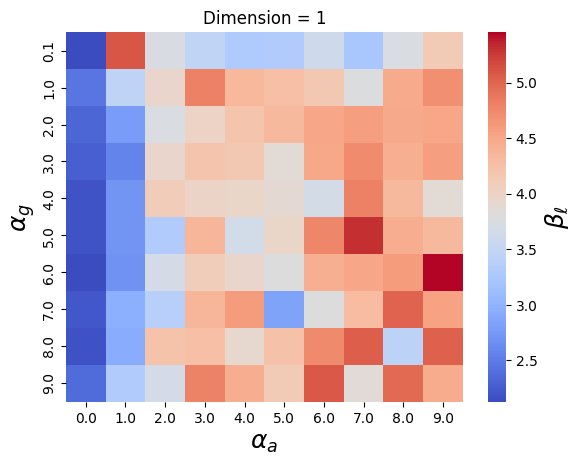

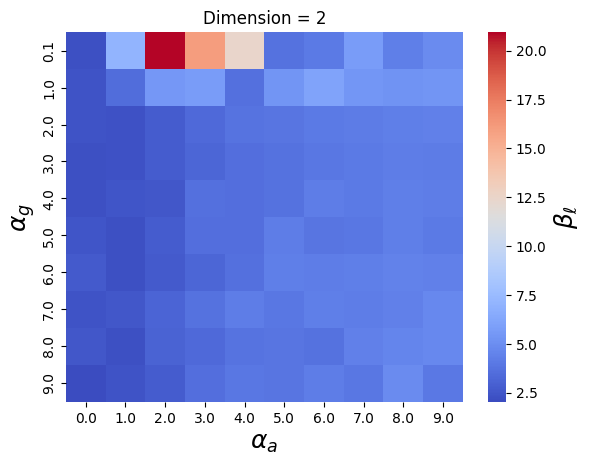

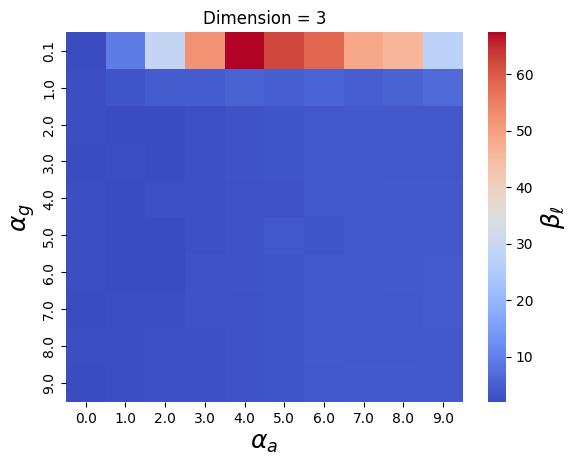

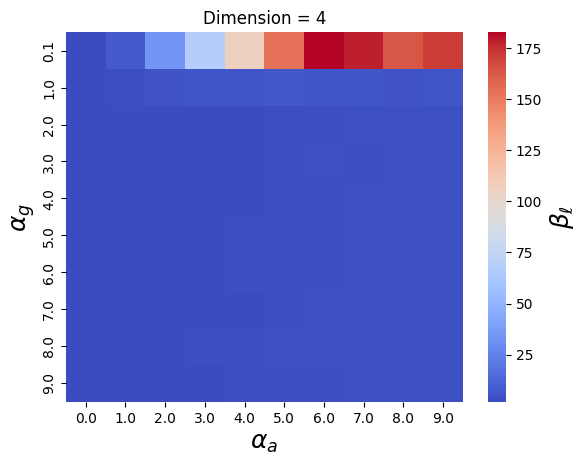

In [12]:
for d in [1,2,3,4]:
    heatmap(df,  dim = d)